In [40]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/'))

In [41]:
import numpy as np

import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from ibm.ibm_parameters import *

from matplotlib import pyplot as plt
%matplotlib inline

from ibm_landscape_processes import *

ibmqfactory.load_account:WARNING:2021-08-24 16:00:45,960: Credentials are already in use. The existing account in the session will be replaced.


In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


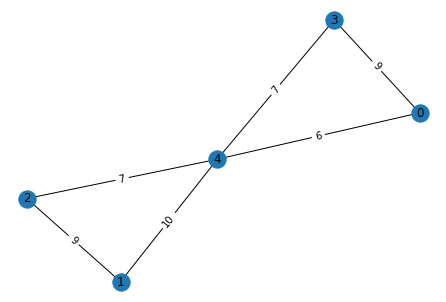

In [99]:
# ---- Define graph and MaxCut ----
graph = generate_butterfly_graph(with_weights=True)
#graph = load_nx_graph_from("/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/data/graphs/16_nodes/graph_16_33_01.txt")
#graph = load_nx_graph_from("/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/data/graphs/10_nodes/graph_22_01_w.txt")

max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [82]:
max_cut_qubo.objective.linear.to_dict()

{0: -16.0,
 5: -35.0,
 1: -34.0,
 8: -32.0,
 3: -19.0,
 7: -36.0,
 2: -6.0,
 9: -16.0,
 4: -9.0,
 6: -21.0}

In [50]:
m = max_cut_qubo.to_docplex()
m.prettyprint()

// This file has been generated by DOcplex
// model name is: Max-cut
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;
dvar bool x_9;

minimize
 - 29 x_0 - 26 x_1 - 35 x_2 - 31 x_3 - 35 x_4 - 35 x_5 - 33 x_6 - 39 x_7
 - 21 x_8 - 32 x_9 [ 18 x_0*x_1 + 18 x_0*x_2 + 6 x_0*x_5 + 8 x_0*x_6
 + 8 x_0*x_8 + 6 x_1*x_2 + 6 x_1*x_3 + 12 x_1*x_4 + 6 x_1*x_7 + 4 x_1*x_8
 + 2 x_2*x_3 + 10 x_2*x_4 + 20 x_2*x_5 + 14 x_2*x_6 + 14 x_3*x_4 + 16 x_3*x_7
 + 4 x_3*x_8 + 20 x_3*x_9 + 12 x_4*x_5 + 14 x_4*x_6 + 8 x_4*x_7 + 10 x_5*x_6
 + 4 x_5*x_8 + 18 x_5*x_9 + 18 x_6*x_7 + 2 x_6*x_8 + 12 x_7*x_8 + 18 x_7*x_9
 + 8 x_8*x_9 ];
 
subject to {

}


In [42]:
max_cut_qubo.objective.quadratic.to_dict()

{(0, 1): 18.0,
 (0, 2): 18.0,
 (1, 2): 6.0,
 (1, 3): 6.0,
 (2, 3): 2.0,
 (1, 4): 12.0,
 (2, 4): 10.0,
 (3, 4): 14.0,
 (0, 5): 6.0,
 (2, 5): 20.0,
 (4, 5): 12.0,
 (0, 6): 8.0,
 (2, 6): 14.0,
 (4, 6): 14.0,
 (5, 6): 10.0,
 (1, 7): 6.0,
 (3, 7): 16.0,
 (4, 7): 8.0,
 (6, 7): 18.0,
 (0, 8): 8.0,
 (1, 8): 4.0,
 (3, 8): 4.0,
 (5, 8): 4.0,
 (6, 8): 2.0,
 (7, 8): 12.0,
 (3, 9): 20.0,
 (5, 9): 18.0,
 (7, 9): 18.0,
 (8, 9): 8.0}

In [13]:
# ---- load results matrix   ----
with open('landscape_simulator_butterfly_weights_results.npy', 'rb') as f:
    landscape = np.load(f)
    step_size = 0.1

In [14]:
# Mean of landscape
np.mean(landscape)

-23.580190544947982

In [15]:
# Minimium 
np.min(landscape)

-32.02949905395508

In [16]:
# Display Coordinates of Minimum 
np.unravel_index(np.argmin(landscape), landscape.shape)

(15, 5)

In [37]:
# Gamma and beta value of Minimium
beta, gamma = np.unravel_index(np.argmin(landscape), landscape.shape)
opt_gamma = gamma * step_size
opt_beta = beta * step_size
print(f"Opt.Gamma: {opt_gamma}, Opt.Beta: {opt_beta}")

Opt.Gamma: 0.5, Opt.Beta: 1.5


In [38]:
import plotly.graph_objects as go

In [42]:
# Plot landscape in 3D 
a_gamma = np.arange(0, np.pi, step_size)
b_beta = np.arange(0, np.pi, step_size)
fig = go.Figure(data=go.Surface(z=landscape, y=b_beta, x=a_gamma))

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor='limegreen', project_z=True))


fig.update_layout(title="QAOA MaxCut", scene=dict(
    xaxis_title="gamma",
    yaxis_title="beta",
    zaxis_title="mean"
))

In [384]:
# Plot Heatmap 
fig = go.Figure(data=go.Heatmap(z=landscape, y=b_beta, x=a_gamma, type = 'heatmap', colorscale = 'viridis'))

# Update Layout
fig.update_layout(title="QAOA MaxCut", width=700, height=700, yaxis_title="beta", xaxis_title="gamma")

# Display Global Minimium 
fig.add_trace(
    go.Scatter(mode="markers", y=[opt_beta], x=[opt_gamma], marker_symbol=[204], text = [landscape[beta,gamma]],
                   marker_color="red",  hovertemplate="x: %{x}<br>y: %{y}<br> z: %{text:.2f}<extra></extra>", 
                   marker_line_width=1, marker_size=16))


In [44]:
quantum_instance = QuantumInstance(
                    backend=Aer.get_backend(DEFAULT_QASM_SIMULATOR),
                    shots=SHOTS
)

In [18]:
BACKEND_NAME = 'ibmq_toronto'
provider = qiskit.IBMQ.get_provider(hub='ibm-q-unibw', group='hochschule-muc', project='masterarbeit')
noise_backend = provider.get_backend(BACKEND_NAME)
noise_model = NoiseModel.from_backend(noise_backend)
coupling_map = noise_backend.configuration().coupling_map
basis_gates = noise_model.basis_gates

In [25]:
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

quantum_instance_noise = QuantumInstance(
                backend=Aer.get_backend(DEFAULT_QASM_SIMULATOR),
                shots=SHOTS,
                noise_model=noise_model,
                coupling_map=coupling_map,
                basis_gates=basis_gates,
                measurement_error_mitigation_cls=CompleteMeasFitter,
                measurement_error_mitigation_shots=SHOTS
)

In [100]:
qaoa = QAOA(optimizer=COBYLA(maxiter=0),
            quantum_instance=quantum_instance,
            reps=1,
            #initial_point=[1.25, 0.05]
           )

algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(max_cut_qubo)
optimal_parameters = qaoa.optimal_params
print(f"Optimal Parameters: {optimal_parameters}")

Optimal Parameters: [ 3.8587726  -2.40686464]


optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (32) is too large to display. Skip.
Expectation Value: -25.466874999999995
Highest Exp.Value: 0 with 0.008
Lowest Exp.Value: -35 with 0.02875
Highest Probability: -33 with 0.45112
Ratio r: 0.7276249999999999
MSE: 111.03402995793266
RMSE: 10.537268619425655


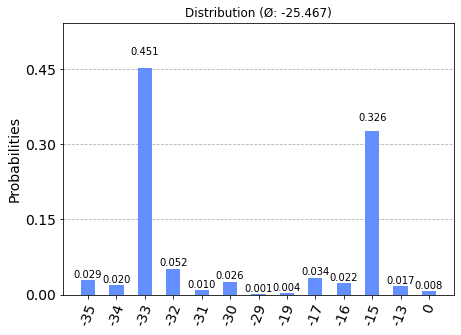

In [101]:
mean, distribution = max_cut.analyse(result, print_output=True)
max_cut.plot_histogram(distribution, mean)

## WarmStart

In [102]:
from qiskit_optimization.algorithms import WarmStartQAOAOptimizer, CobylaOptimizer, MinimumEigenOptimizer, GroverOptimizer,  SlsqpOptimizer
from shared.Mitiq_QAOA import *
def run_qaoa_ws(epsilon=0.1, print_output=True):
    qaoa = QAOA(optimizer=COBYLA(maxiter=0),
                    quantum_instance=quantum_instance,
                    reps=1,
                    #initial_point=[1.25, 0.05]
               )

    ws_qaoa = WarmStartQAOAOptimizer(pre_solver=CobylaOptimizer(), relax_for_pre_solver=True, qaoa=qaoa, epsilon=epsilon)

    result = ws_qaoa.solve(max_cut_qubo)
    optimal_parameters = qaoa.optimal_params
    mean, distribution = max_cut.analyse(result, print_output=print_output)
    if print_output:
        max_cut.plot_histogram(distribution, mean)
    #print(f"Optimal Parameters: {optimal_parameters % 3.14}")
    return mean

optimal function value: -34.0
optimal value: [1. 1. 0. 0. 0.]
status: SUCCESS
10000: value: -15.000, probability: 0.0%
11011: value: -16.000, probability: 0.0%
01000: value: -19.000, probability: 0.7%
11100: value: -32.000, probability: 0.6%
11010: value: -32.000, probability: 0.6%
11001: value: -32.000, probability: 0.5%
11000: value: -34.000, probability: 97.5%
Expectation Value: -33.857
Highest Exp.Value: -15 with 0.00025
Lowest Exp.Value: -34 with 0.9755
Highest Probability: -34 with 0.9755
Ratio r: 0.9924736842105263
MSE: 179.73164899999998
RMSE: 13.406403283505982


-33.857

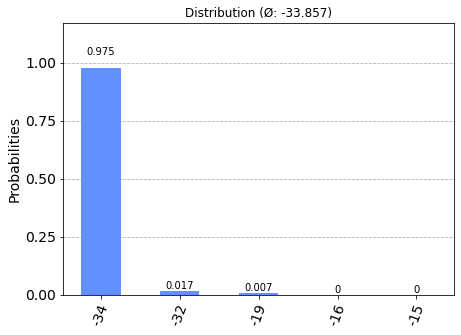

In [104]:
run_qaoa_ws(0.002)

In [93]:
means = []
eps = []
for e in range(50,-1, -1):
    epsi = e*0.01
    eps.append(epsi)
    means.append( run_qaoa_ws(epsi, False) )
#means

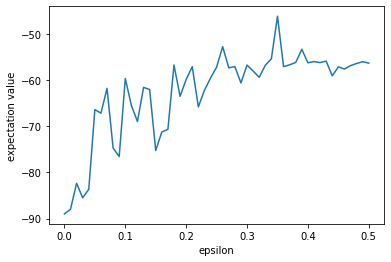

In [94]:
import matplotlib.pyplot as plt
plt.plot(eps, means)
plt.xlabel('epsilon')
plt.ylabel('expectation value')
plt.show()

In [412]:
from qiskit_optimization.algorithms import WarmStartQAOAOptimizer, CobylaOptimizer, MinimumEigenOptimizer, SlsqpOptimizer
from shared.Mitiq_QAOA import *
def run_qaoa_ws_mitiq(epsilon=0.1, print_output=True):
    
    
        # generate QAOA to get circuit
    pre_qaoa = QAOA(optimizer=COBYLA(maxiter=0), quantum_instance=quantum_instance_noise, reps=1, initial_point=[opt_gamma, opt_beta])
    MinimumEigenOptimizer(pre_qaoa).solve(max_cut_qubo)

    circuit = pre_qaoa.get_optimal_circuit()
    circuit.measure_all()
    
    qaoa = Mitiq_QAOA(
                    mitiq_circuit=circuit.copy(),
                    optimizer=COBYLA(maxiter=5),
                    quantum_instance=quantum_instance_noise,
                    reps=1,
                    initial_point=[opt_gamma, opt_beta]
               )

    #ws_qaoa = WarmStartQAOAOptimizer(pre_solver=CobylaOptimizer(), relax_for_pre_solver=True, qaoa=qaoa, epsilon=epsilon)
    #result = ws_qaoa.solve(max_cut_qubo)
    
    algorithm = MinimumEigenOptimizer(qaoa)
    result = algorithm.solve(max_cut_qubo)
    
    optimal_parameters = qaoa.optimal_params
    mean, distribution = max_cut.analyse(result, print_output=print_output)
    if print_output:
        max_cut.plot_histogram(distribution, mean)
    #print(f"Optimal Parameters: {optimal_parameters % 3.14}")
    return mean

In [413]:
run_qaoa_ws_mitiq(0.02)

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

In [361]:
means = []
eps = []
for e in range(50,-1, -1):
    epsi = e*0.01
    eps.append(epsi)
    means.append( run_qaoa_ws_mitiq(epsi, False) )
#means

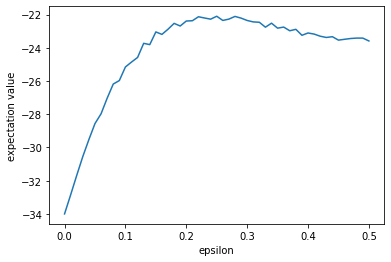

In [312]:
import matplotlib.pyplot as plt
plt.plot(eps, means)
plt.xlabel('epsilon')
plt.ylabel('expectation value')
plt.show()

## Error Mitigation

In [166]:
quantum_instance = QuantumInstance(
                    backend=Aer.get_backend(DEFAULT_QASM_SIMULATOR),
                    shots=SHOTS,
                    measurement_error_mitigation_cls=CompleteMeasFitter,
                    measurement_error_mitigation_shots=SHOTS)

In [66]:
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
qaoa = QAOA(optimizer=COBYLA(maxiter=0),
            quantum_instance=quantum_instance,
            reps=1,
            initial_point=[opt_gamma, opt_beta])

algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(max_cut_qubo)
optimal_parameters = qaoa.optimal_params
print(f"Optimal Parameters: {optimal_parameters}")

Optimal Parameters: [0.5 1.5]


optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (32) is too large to display. Skip.
Expectation Value: -31.96962552143264
Highest Exp.Value: 0 with 0.002125 %
Lowest Exp.Value: -35 with 0.19025 %
Highest Probability: -34 with 0.26475 %
Ratio r: 0.9134178720409326
MSE: 180.40062390132604
RMSE: 13.431329937922232


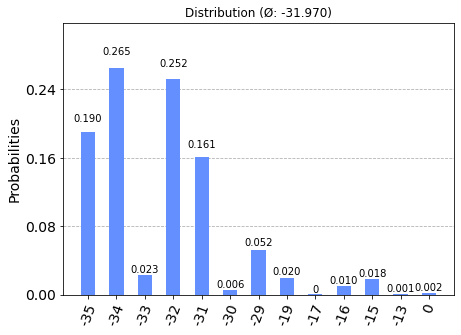

In [67]:
mean, distribution = max_cut.analyse(result, print_output=True)
max_cut.plot_histogram(distribution, mean)

In [ ]:
# Display Optimizer Results

# Display path 
#fig.add_trace(
#    go.Scatter(mode="lines", x=gammas, y=betas, marker_symbol=[200],
#                   marker_color="white", marker_line_width=1, marker_size=8)
#)

# Display start point
#fig.add_trace(
#    go.Scatter(mode="markers", x=[gammas[0]], y=[betas[0]], marker_symbol=[204],
#                   marker_color="gray", 
#                   marker_line_width=1, marker_size=16))

# Display end point
#fig.add_trace(
#    go.Scatter(mode="markers", x=[gammas[-1]], y=[betas[-1]], marker_symbol=[204],
#                   marker_color="green", 
#                   marker_line_width=1, marker_size=16))



In [ ]:
# Plot Optimizer History
#fig = go.Figure(data=go.Scatter(x=counts, y=values))
#fig.update_layout(xaxis_title="Evaluation Counts", yaxis_title="Evaluated Mean", title="Optimizer")
#fig.show()